In [1]:
import pandas as pd
df=pd.read_csv('phishing.csv')
df.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df.isnull().sum().sum()


np.int64(0)

In [4]:
df.duplicated().sum()

np.int64(0)

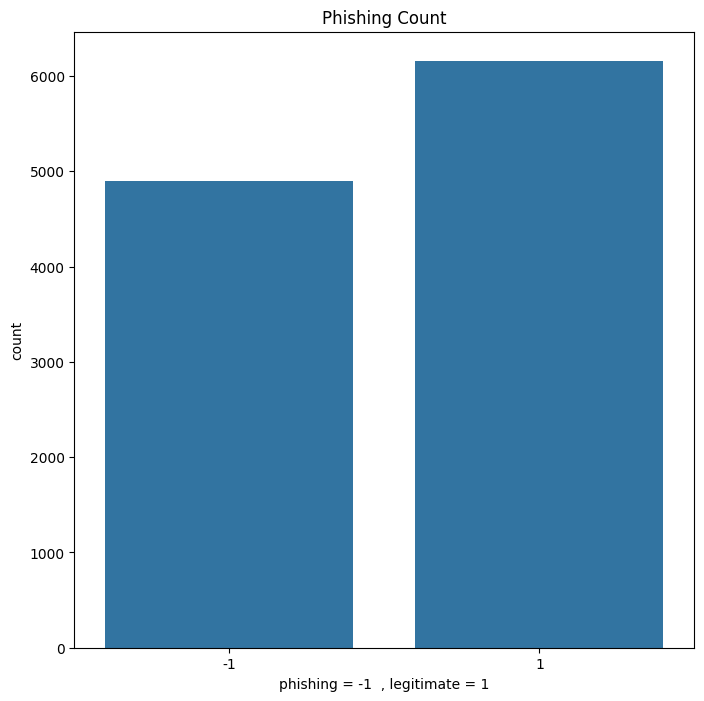

In [5]:
plt.figure(figsize=(8,8))
sns.countplot(x='class',data=df)
plt.title("Phishing Count")
plt.xlabel('phishing = -1  , legitimate = 1')
plt.show()

# explore the data with countplot

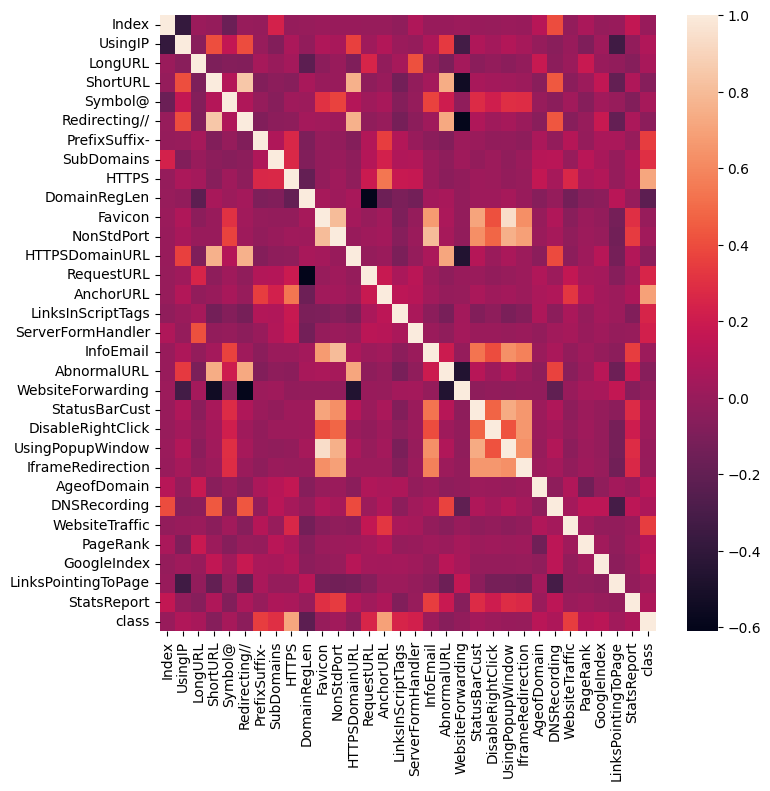

In [6]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr())
plt.show()

# explore the data with heatmap (32*32)

In [7]:
X = df.drop(columns=["Index", "class"])  # remove Index and class
y = df["class"]
feature_names = X.columns.tolist()

In [8]:
# Save them for Flask
import joblib
joblib.dump(feature_names, "model/feature_names.pkl")
print("Feature names saved to model/feature_names.pkl")

Feature names saved to model/feature_names.pkl


In [9]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# split the data

In [10]:
from sklearn.ensemble import RandomForestClassifier

Model = RandomForestClassifier()
Model.fit(X_train,y_train)

# train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)  # now rf_model exists

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
import joblib
import os

# Create 'model' folder if it doesn't exist
if not os.path.exists("model"):
    os.makedirs("model")

# Save the trained model
joblib.dump(rf_model, "model/Phishing_URL_detection.pkl")


['model/Phishing_URL_detection.pkl']

In [12]:
from sklearn.metrics import classification_report
y_pred = Model.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_pred, target_names=['Phishing (-1)', 'Legitimate (1)']))


                precision    recall  f1-score   support

 Phishing (-1)       0.97      0.96      0.96      1455
Legitimate (1)       0.97      0.98      0.97      1862

      accuracy                           0.97      3317
     macro avg       0.97      0.97      0.97      3317
  weighted avg       0.97      0.97      0.97      3317



In [13]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,y_pred)
print(f"""The Accuracy : {accuracy *100:.2f}%""")

# evaluate the model with accuracy score

The Accuracy : 96.80%


In [14]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

# evaluate the model with classification report

              precision    recall  f1-score   support

          -1       0.97      0.96      0.96      1455
           1       0.97      0.98      0.97      1862

    accuracy                           0.97      3317
   macro avg       0.97      0.97      0.97      3317
weighted avg       0.97      0.97      0.97      3317



In [15]:
print(f"""Train Score : {Model.score(X_train,y_train) * 100:.2f}%""")
print(f"""Test Score : {Model.score(X_test,y_test) * 100:.2f}%""")

# Display training and test accuracy

Train Score : 99.19%
Test Score : 96.80%


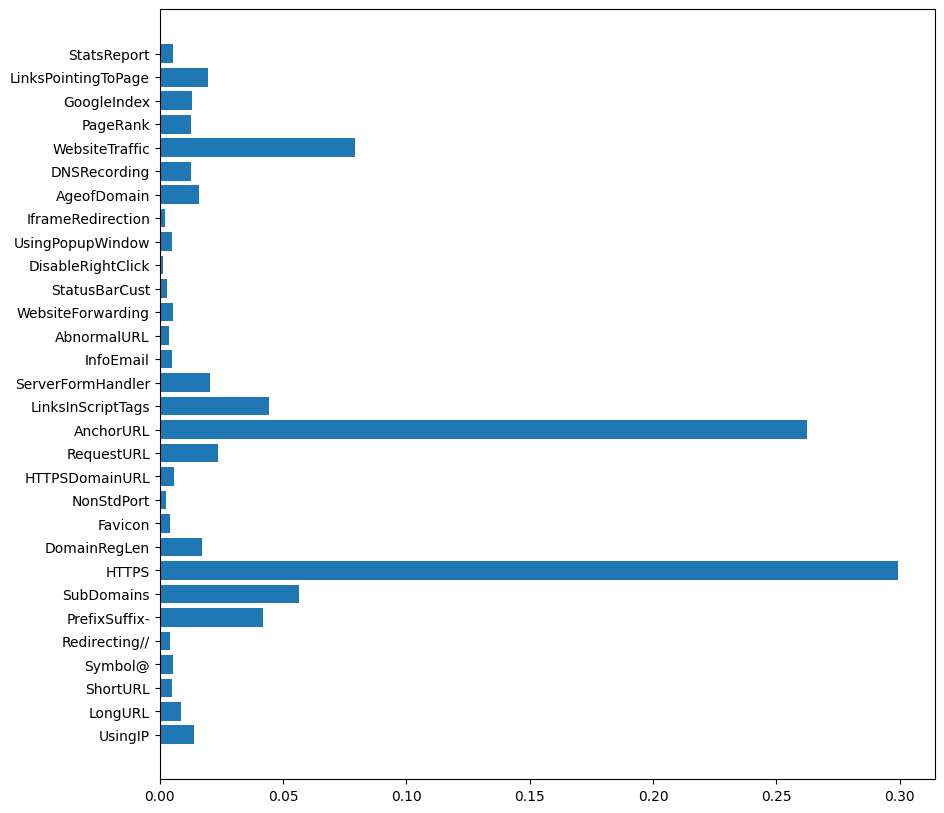

In [16]:
importanc = Model.feature_importances_
columns = X.columns

plt.figure(figsize=(10,10))
plt.barh(columns,importanc)
plt.show()

# visualize feature importance